# True vs Reco for interferometry

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
import pyrex
import pyrex.custom.ara as ara
from pyrex.internal_functions import normalize
import os

import seaborn as sns

# mpl.use('agg') 
mpl.rcParams['text.usetex'] = True
mpl.rcParams['text.latex.unicode'] = True
mpl.rcParams['mathtext.rm'] = 'Times New Roman'
mpl.rcParams['mathtext.it'] = 'Times New Roman:italic'
mpl.rcParams['mathtext.bf'] = 'Times New Roman:bold'

mpl.rc('font', family='serif', size=12)
mpl.rcParams['xtick.labelsize'] = 14
mpl.rcParams['ytick.labelsize'] = 14
mpl.rcParams['xtick.major.size'] = 5
mpl.rcParams['ytick.major.size'] = 5

mpl.rcParams['axes.titlesize'] = 18
mpl.rcParams['axes.labelsize'] = 18
mpl.rc('font', size=16)
mpl.rc('axes', titlesize=20)

# import mplcyberpunk
# plt.style.use("cyberpunk")

current_palette = sns.color_palette('colorblind', 10)

In [31]:
interf = pd.read_pickle("/users/PAS0654/osu8354/ARA_cvmfs/source/AraRoot/analysis/ARA_analysis/Reco_sim/reco_code/Interf_RecoVsTrue_simple.pkl")
interf = interf.loc[interf.maxAmplitude<1500]
interf = interf.loc[interf.maxAmplitude>500]

interf = interf.loc[interf.theta_reco>90]

interf.tail()

,EvNum,theta_reco,theta_true,phi_reco,phi_true,weight,maxAmplitude
1117,992021,93.0,98.521396,164.0,163.780311,1.168158e-04,809.613764
1118,992156,109.0,111.173859,127.0,126.753027,3.503074e-08,543.626240
1124,999719,117.0,118.171773,38.0,38.659708,4.266334e-09,535.852974
1125,1000579,96.0,99.759033,152.0,152.046855,9.987306e-01,590.628185
1126,1002024,116.0,116.448518,178.0,178.214368,9.953586e-01,851.932194


In [32]:
len(interf)

245

Text(0.5,0,'$\\theta_{true}-\\theta_{reco}$')

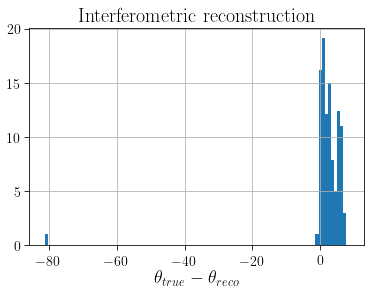

In [33]:
delta = np.array(interf.theta_true-interf.theta_reco)
plt.hist(delta, bins = 100, weights=interf.weight);
plt.grid()
plt.title("Interferometric reconstruction")
plt.xlabel(r"$\theta_{true}-\theta_{reco}$")
# plt.yscale("log")
# plt.xlim(-15,15)

In [34]:
delta.mean()

1.7337382998527866

Text(0.5,0,'$\\phi_{true}-\\phi_{reco}$')

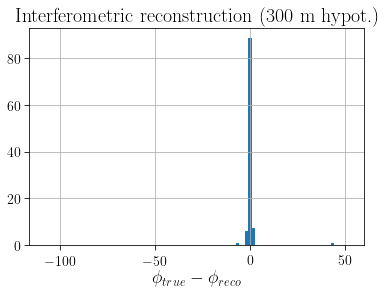

In [35]:
delta = np.array(interf.phi_true-interf.phi_reco)
plt.hist(delta, bins = 100, weights=interf.weight);
plt.grid()
plt.title("Interferometric reconstruction (300 m hypot.)")
plt.xlabel(r"$\phi_{true}-\phi_{reco}$")
# plt.yscale("log")
# plt.xlim(-15,15)

In [36]:
def weighted_avg_and_std(values, weights):
    """
    Return the weighted average and standard deviation.

    values, weights -- Numpy ndarrays with the same shape.
    """
    average = np.average(values, weights=weights)
    # Fast and numerically precise:
    variance = np.average((values-average)**2, weights=weights)
    return (average, np.sqrt(variance))

In [37]:
weighted_avg_and_std(delta, interf.weight)

(0.3845224004134849, 4.352910146845365)

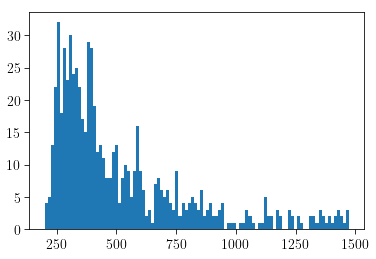

In [21]:
plt.hist(interf.maxAmplitude, bins = 100);

In [45]:
100*len(interf.loc[interf.maxAmplitude>1499])/len(interf)

9.725906277630415